# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка PyTorch. 

## На сегодняшней лекции мы разберем, зачем нужны фреймворки для глубинного обучения и как устроены базовые методы и классы PyTorch

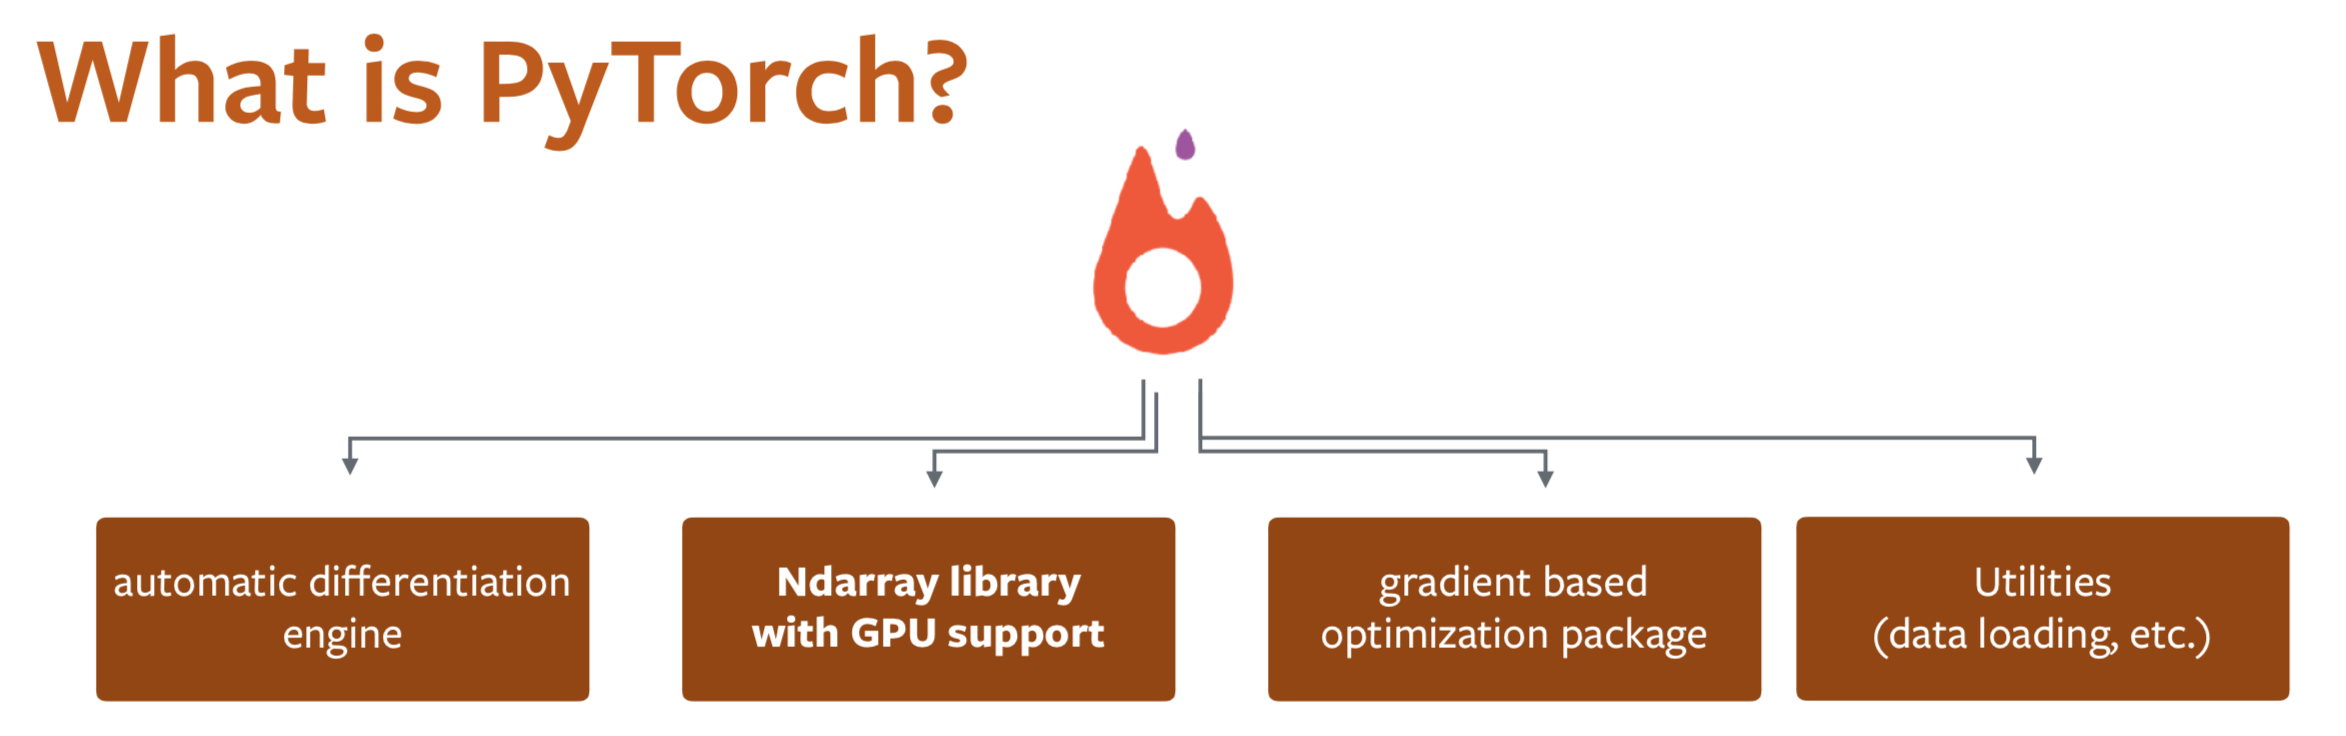

In [2]:
import IPython
IPython.display.Image("pytorch.png")

#        Пример обучения нейронной сети в numpy

In [5]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 45053938.78156029
1 48509760.97736143
2 53344222.94502047
3 45855692.8074742
4 27651827.188230447
5 11749055.98863487
6 4744837.8876612345
7 2407507.9739261614
8 1597272.2559768194
9 1221791.6961532382
10 988825.4285115467
11 818761.290093642
12 685898.0167133345
13 578991.5581862119
14 491762.82401447854
15 419960.6577621042
16 360431.7393434505
17 310859.31314486417
18 269219.73462931113
19 234009.80863297966
20 204120.45359676908
21 178587.35219621062
22 156732.66139273276
23 137913.28823626525
24 121648.16115923636
25 107581.264684063
26 95348.20903049549
27 84680.95486678724
28 75356.8062217427
29 67172.71163585057
30 59979.10344762683
31 53639.54944526378
32 48042.91314206597
33 43093.27573028951
34 38703.72076888393
35 34810.90136178743
36 31356.05752840438
37 28277.57481068
38 25528.264782521605
39 23072.508684681445
40 20875.16005747124
41 18905.65632628582
42 17137.453233860917
43 15549.298530152046
44 14120.16166235547
45 12835.528810094982
46 11677.882154690295
47 10634.0

362 0.00014117740624275624
363 0.00013416332852125203
364 0.00012750113815886477
365 0.00012116739569479274
366 0.00011515025777538003
367 0.0001094319453152127
368 0.0001039990248075507
369 9.883739814049386e-05
370 9.39302163223018e-05
371 8.926686787597822e-05
372 8.483663479330483e-05
373 8.062648919429042e-05
374 7.662849013035297e-05
375 7.282697624992104e-05
376 6.921349813530836e-05
377 6.578011893386556e-05
378 6.251752530983496e-05
379 5.941791028959197e-05
380 5.6472468404351775e-05
381 5.3672367383478366e-05
382 5.10129680972676e-05
383 4.848433303829979e-05
384 4.608141064442051e-05
385 4.3798167317147526e-05
386 4.162784243576869e-05
387 3.956515149218839e-05
388 3.7605252800264e-05
389 3.574265796834776e-05
390 3.397376857994466e-05
391 3.2291436106181115e-05
392 3.0692245964367075e-05
393 2.917236935126703e-05
394 2.7728118245337224e-05
395 2.6356215459540705e-05
396 2.5052208758069083e-05
397 2.3812679946461716e-05
398 2.2634380626207345e-05
399 2.1514362963055612e-05


# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от __np.ndarray__, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [6]:
import torch

In [3]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [4]:
x

tensor([[3.5873e-43, 3.6013e-43, 3.5873e-43],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1614e-41, 0.0000e+00, 2.2369e+08],
        [0.0000e+00, 0.0000e+00, 2.1524e-42]])

In [5]:
# Типы
torch.FloatTensor
torch.LongTensor
torch.ByteTensor

torch.ByteTensor

In [6]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [7]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [8]:
x

tensor([[-2.7879, -0.0089, -0.5543],
        [ 0.2752,  1.0058, -0.6496],
        [ 1.0093, -0.4011, -1.5398],
        [-1.9046,  1.2628,  0.4121],
        [ 2.4455,  0.2407,  0.5486]])

In [9]:
x.shape

torch.Size([5, 3])

In [10]:
x.size()

torch.Size([5, 3])

In [11]:
y = torch.rand(5, 3)

In [12]:
y

tensor([[0.8169, 0.9751, 0.1293],
        [0.2617, 0.3924, 0.4295],
        [0.6310, 0.1886, 0.5923],
        [0.7148, 0.8061, 0.3595],
        [0.5420, 0.3795, 0.8451]])

In [13]:
# Первый способ сложить 2 тензора
x + y

tensor([[-1.9709,  0.9662, -0.4251],
        [ 0.5369,  1.3981, -0.2201],
        [ 1.6403, -0.2125, -0.9475],
        [-1.1898,  2.0689,  0.7716],
        [ 2.9875,  0.6202,  1.3937]])

In [ ]:
# Второй способ сложить 2 тензора
x.add(y)

In [ ]:
# А еще можно так:
torch.add(x, y)

In [ ]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)

In [17]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [18]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [19]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)

tensor([[ 0.4479,  0.1510,  0.6963,  0.5015],
        [ 1.0636,  0.2238,  1.5977, -0.3606],
        [-0.8042,  0.8709, -0.0639,  0.1208],
        [-0.6327,  0.1513, -0.6294,  0.0334],
        [-0.0902,  0.3111,  0.2135,  0.2209]])

In [20]:
# для python 3

a @ b

tensor([[ 0.4479,  0.1510,  0.6963,  0.5015],
        [ 1.0636,  0.2238,  1.5977, -0.3606],
        [-0.8042,  0.8709, -0.0639,  0.1208],
        [-0.6327,  0.1513, -0.6294,  0.0334],
        [-0.0902,  0.3111,  0.2135,  0.2209]])

Поменяем пару строчек в обучении на __numpy__ и код уже можно запускать и на GPU. Например, __x = x.cuda()__

In [7]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 tensor(45202980.)
1 tensor(46196652.)
2 tensor(45810108.)
3 tensor(36186880.)
4 tensor(20677322.)
5 tensor(9474668.)
6 tensor(4340810.)
7 tensor(2438206.5000)
8 tensor(1677920.3750)
9 tensor(1299596.)
10 tensor(1061941.6250)
11 tensor(889287.8125)
12 tensor(754646.2500)
13 tensor(646466.1250)
14 tensor(557949.5000)
15 tensor(484482.6875)
16 tensor(422936.7188)
17 tensor(371192.4375)
18 tensor(327303.2188)
19 tensor(289779.1562)
20 tensor(257529.6562)
21 tensor(229629.3594)
22 tensor(205359.6250)
23 tensor(184165.4688)
24 tensor(165622.8906)
25 tensor(149350.1562)
26 tensor(134978.7500)
27 tensor(122243.9609)
28 tensor(110923.5000)
29 tensor(100833.6562)
30 tensor(91828.4688)
31 tensor(83762.3594)
32 tensor(76520.6797)
33 tensor(70006.1953)
34 tensor(64132.7578)
35 tensor(58827.5977)
36 tensor(54028.3711)
37 tensor(49676.8828)
38 tensor(45727.2930)
39 tensor(42136.0234)
40 tensor(38865.4023)
41 tensor(35883.2227)
42 tensor(33164.3125)
43 tensor(30679.8086)
44 tensor(28403.4727)
45 ten

452 tensor(0.0005)
453 tensor(0.0005)
454 tensor(0.0005)
455 tensor(0.0005)
456 tensor(0.0005)
457 tensor(0.0005)
458 tensor(0.0005)
459 tensor(0.0005)
460 tensor(0.0004)
461 tensor(0.0004)
462 tensor(0.0004)
463 tensor(0.0004)
464 tensor(0.0004)
465 tensor(0.0004)
466 tensor(0.0004)
467 tensor(0.0004)
468 tensor(0.0004)
469 tensor(0.0004)
470 tensor(0.0003)
471 tensor(0.0003)
472 tensor(0.0003)
473 tensor(0.0003)
474 tensor(0.0003)
475 tensor(0.0003)
476 tensor(0.0003)
477 tensor(0.0003)
478 tensor(0.0003)
479 tensor(0.0003)
480 tensor(0.0003)
481 tensor(0.0003)
482 tensor(0.0003)
483 tensor(0.0003)
484 tensor(0.0002)
485 tensor(0.0002)
486 tensor(0.0002)
487 tensor(0.0002)
488 tensor(0.0002)
489 tensor(0.0002)
490 tensor(0.0002)
491 tensor(0.0002)
492 tensor(0.0002)
493 tensor(0.0002)
494 tensor(0.0002)
495 tensor(0.0002)
496 tensor(0.0002)
497 tensor(0.0002)
498 tensor(0.0002)
499 tensor(0.0002)


# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [33]:
# Тензор так же может содержать в себе информацию о графе вычислений 
# (в прошлых версиях Pytorch был отдельный класс torch.autograd.Variable)

import torch
x = torch.ones(2, 2, requires_grad = True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [9]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [10]:
x.grad

In [11]:
# производная операции, которая породила переменную.
x.grad_fn

In [34]:
x = x +2

In [36]:
x

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [35]:
x.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

# Задаем граф вычислений: #

In [12]:
y = x + 2
z = 2 * y * y
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward0>)

In [13]:
# Запускаем бэкпроп
out.backward()

In [14]:
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [15]:
z.grad_fn

In [16]:
out.grad == None

<ipython-input-16-d4f3b69ca28c>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  out.grad == None


True

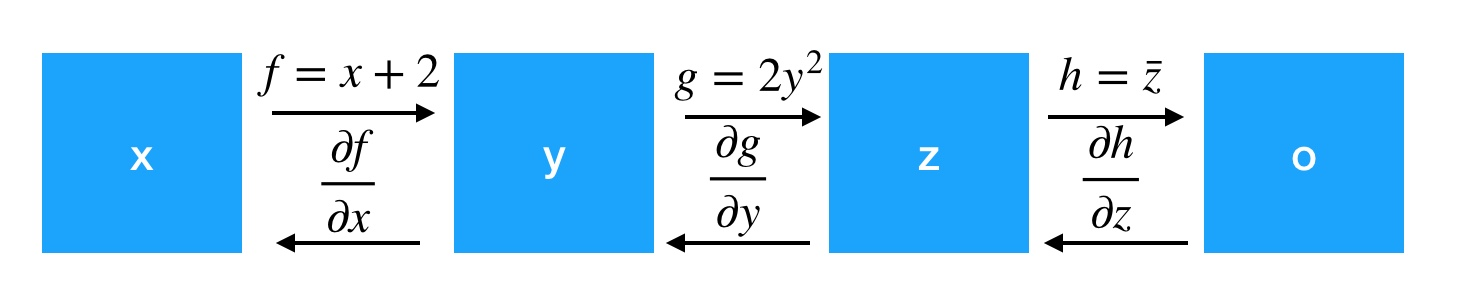

In [4]:
IPython.display.Image("diff.jpeg")

# Что произошло?

__autograd__ строит ациклический граф вычисления из переменных и операций (функций)

__out.backward__ проходит по всему графу начиная от вершины out и считает градиенты вершин

В __pyTorch__ начиная с версии 0.3 промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию __ Tensor.register_hook(print)__
или использовать __Tensor.retain_grad()__

In [22]:
from __future__ import print_function
x = torch.ones(2, 2, requires_grad = True)
y.register_hook(print)
y = x + 2
z = y * y * 2
z.register_hook(print)
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward0>)

In [23]:
# Снова запускаем бэкпроп

out.backward()

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [24]:
v = torch.randn(3, requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

tensor([1., 1., 1.])

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [26]:
f = torch.Tensor([2,3]).requires_grad_()
g = f[0] * f[1]
g.backward(retain_graph=True)
print(f.grad)
g.backward()
print(f.grad)

tensor([3., 2.])
tensor([6., 4.])


In [27]:
f = torch.Tensor([2,3]).requires_grad_()
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [28]:
x = torch.ones(2, 2, requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



tensor([[1., 1.],
        [1., 1.]])

__torch.autograd.Function__ - базовый класс дифференецируемых функций-составных частей графа вычислений

In [ ]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



# Снова вернемся к исходной двухслойной сети

In [ ]:

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)


w1 = torch.randn(D_in, H, requires_grad=True).type(dtype)
w2 = torch.randn(H, D_out, requires_grad=True).type(dtype)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    

    loss.backward()

    # С помощью torch.no_grad говорим pytorch, что следующие операции не нужно сохранять в графе
    with torch.no_grad():
        # Обнуляем градиенты
        if w1.grad is not None:
            w1.grad.data.zero_()
        if w2.grad is not None:
            w2.grad.data.zero_()
        
        # Делаем шаг градиентного спуска
        w1.data -= learning_rate * w1.grad.data
        w2.data -= learning_rate * w2.grad.data

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

### ``Sequential`` - последовательность базовых слоев и функций активаций
### ``Linear(input dimension, output dimension)`` - линейный слой
### ``torch.nn.ReLU``, ``torch.nn.Sigmoid``,``torch.nn.Tanh``, etc. - функции активации
### ``torch.nn.MSELoss`` - среднеквадратичная функция потерь.

In [29]:
N, D_in, D_latent, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_latent),
          torch.nn.ReLU(),
          torch.nn.Linear(D_latent, D_out),
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    

    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad.data

    model.zero_grad()

/Users/kuzmahrabrov/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 656.1527099609375
1 612.2003784179688
2 573.801513671875
3 539.8323364257812
4 509.48974609375
5 482.0184020996094
6 456.83978271484375
7 433.61456298828125
8 411.9415283203125
9 391.651123046875
10 372.4056701660156
11 354.1952819824219
12 336.93890380859375
13 320.534423828125
14 304.84088134765625
15 289.7699890136719
16 275.3221740722656
17 261.4743957519531
18 248.13394165039062
19 235.32481384277344
20 223.03323364257812
21 211.204345703125
22 199.81106567382812
23 188.8623046875
24 178.3624267578125
25 168.33541870117188
26 158.76123046875
27 149.63687133789062
28 140.92295837402344
29 132.6326141357422
30 124.74407196044922
31 117.27274322509766
32 110.17547607421875
33 103.46283721923828
34 97.12445831298828
35 91.13044738769531
36 85.48580169677734
37 80.16791534423828
38 75.15919494628906
39 70.45037841796875
40 66.03244018554688
41 61.90117263793945
42 58.02550506591797
43 54.38480758666992
44 50.962039947509766
45 47.7581787109375
46 44.75421142578125
47 41.9463233947753

399 0.00011964995064772666
400 0.00011628083302639425
401 0.00011300407641101629
402 0.0001098311404348351
403 0.00010674286750145257
404 0.000103748359833844
405 0.00010083124652737752
406 9.800191037356853e-05
407 9.524725464871153e-05
408 9.257785859517753e-05
409 8.997585973702371e-05
410 8.745370723772794e-05
411 8.500204421579838e-05
412 8.262331539299339e-05
413 8.030892058741301e-05
414 7.805913628544658e-05
415 7.587450090795755e-05
416 7.375019049504772e-05
417 7.16892973287031e-05
418 6.968493107706308e-05
419 6.773471250198781e-05
420 6.584465154446661e-05
421 6.40070138615556e-05
422 6.221946387086064e-05
423 6.048508294043131e-05
424 5.879534364794381e-05
425 5.7158118579536676e-05
426 5.556638279813342e-05
427 5.401456292020157e-05
428 5.251232141745277e-05
429 5.105056334286928e-05
430 4.963039100402966e-05
431 4.824923234991729e-05
432 4.690804416895844e-05
433 4.5602660975418985e-05
434 4.433769572642632e-05
435 4.310610529500991e-05
436 4.190809340798296e-05
437 4.07

In [48]:
loss_fn(model(x), y)

tensor(8.7244e-07, grad_fn=<MseLossBackward>)

# А еще в PyTorch есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [30]:
N, D_in, D_latent, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_latent),
          torch.nn.ReLU(),
          torch.nn.Linear(D_latent, D_out),
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

0 715.0919799804688
1 697.023193359375
2 679.3827514648438
3 662.1763305664062
4 645.4557495117188
5 629.163330078125
6 613.3502807617188
7 597.9869995117188
8 583.0626831054688
9 568.6105346679688
10 554.5908203125
11 541.0003051757812
12 527.7971801757812
13 515.057861328125
14 502.6591491699219
15 490.5436096191406
16 478.7701110839844
17 467.2969970703125
18 456.07403564453125
19 445.1501770019531
20 434.5177917480469
21 424.13739013671875
22 414.042236328125
23 404.2879943847656
24 394.8590087890625
25 385.71624755859375
26 376.79168701171875
27 368.0672912597656
28 359.5237731933594
29 351.1714782714844
30 342.9576416015625
31 334.8816833496094
32 326.9638671875
33 319.2268371582031
34 311.64825439453125
35 304.2264404296875
36 296.9572448730469
37 289.83428955078125
38 282.88922119140625
39 276.0943603515625
40 269.4277038574219
41 262.8822326660156
42 256.44842529296875
43 250.14002990722656
44 243.96090698242188
45 237.89483642578125
46 231.93663024902344
47 226.10440063476562

412 1.4114601071923971e-05
413 1.3369373846217059e-05
414 1.2662881999858655e-05
415 1.1993397492915392e-05
416 1.1357711628079414e-05
417 1.0755824405350722e-05
418 1.0184002348978538e-05
419 9.641999895393383e-06
420 9.126791155722458e-06
421 8.639437510282733e-06
422 8.178854841389693e-06
423 7.741712579445448e-06
424 7.325851129280636e-06
425 6.933049462531926e-06
426 6.560485871887067e-06
427 6.20796572547988e-06
428 5.8722071116790175e-06
429 5.5562877605552785e-06
430 5.256415988696972e-06
431 4.971027465217048e-06
432 4.702707883552648e-06
433 4.447414994501742e-06
434 4.205639925203286e-06
435 3.976633252023021e-06
436 3.760078243431053e-06
437 3.555285275069764e-06
438 3.360426035214914e-06
439 3.1765578114573145e-06
440 3.00293390864681e-06
441 2.8382664822856896e-06
442 2.6818813694262644e-06
443 2.5343331344629405e-06
444 2.394599050603574e-06
445 2.2625406472798204e-06
446 2.13719636121823e-06
447 2.0192367173876846e-06
448 1.9068668279942358e-06
449 1.801336111384444e-06

In [ ]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [51]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [52]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

### ``Module`` - базовый класс для динамического графа вычислений. Это может быть как полный граф, так и один слой сети.


In [ ]:
class LinearLayer(nn.Module):
    def __init__(self, in_sz, out_sz):
        super().__init__()
        t1 = torch.randn(in_sz, out_sz)
        self.w = nn.Parameter(t1)
        t2 = torch.randn(out_sz)
        self.b = nn.Parameter(t2)
    def forward(self, activations):
        t = torch.mm(activations, self.w)
        return t + self.b

### Parameter - специальный подкласс класса Tensor, при добавлении Parameter в аттрибуты класса Module он автоматически добавляется в список параметров модуля (parameters() )

In [ ]:
class FullBasicModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = LinearLayer(128, 10)
        self.fc2 = LinearLayer(10, 10)
    def forward(self, x):
        t1 = self.fc1(x)
        t2 = nn.functional.relu(t1)
        t3 = self.fc2(t1)
        return nn.functional.softmax(t3)

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). 


__PyTorch__ имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


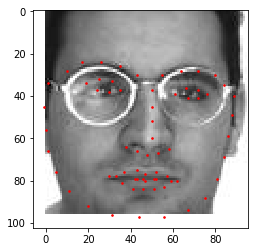

In [1]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [2]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


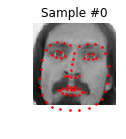

1 (96, 96) (68, 2)


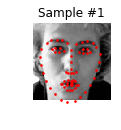

2 (96, 96) (68, 2)


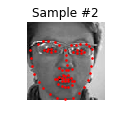

3 (96, 96) (68, 2)


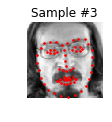

In [3]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [4]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

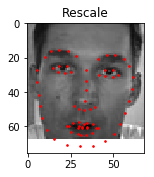

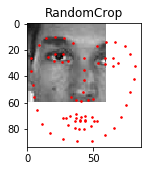

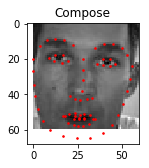

In [5]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [6]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


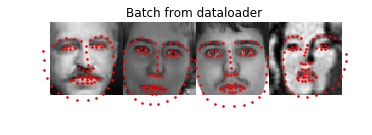

In [7]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("dataset/train/face_landmarks.csv")

# More about CUDA

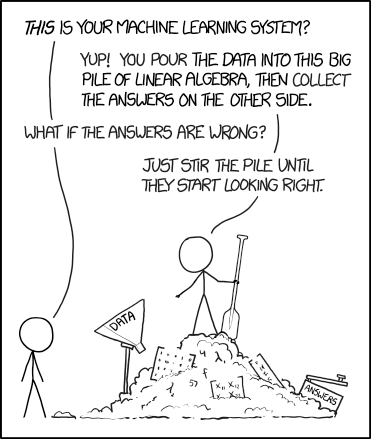

In [31]:
IPython.display.Image("comic.png")

Благодаря своему устройству видеокарты позволяют параллельно выпонять огромное количество простых операций. (Single Instruction, Multiple Data (SIMD))

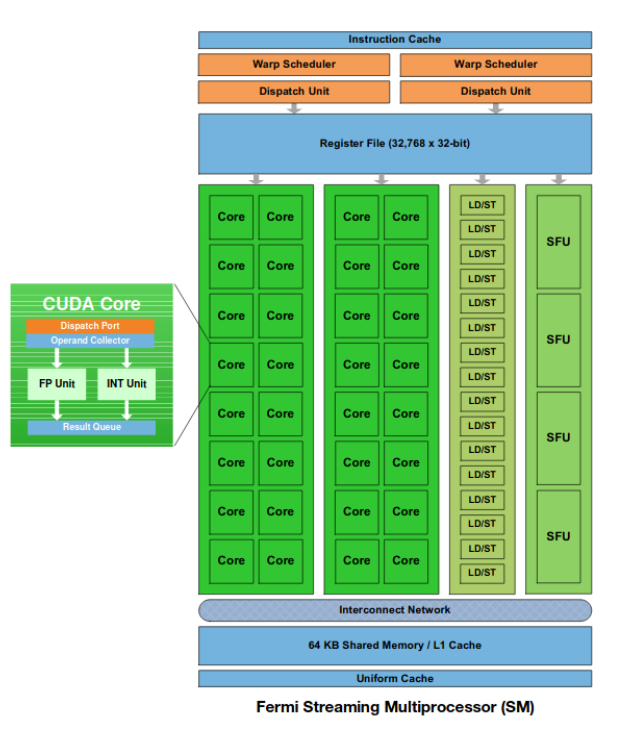

In [32]:
IPython.display.Image("cuda.png")

In [ ]:
cuda = torch.device('cuda')     # Default CUDA device
cuda0 = torch.device('cuda:0')
cuda2 = torch.device('cuda:2')  # GPU 2 (these are 0-indexed)

x = torch.tensor([1., 2.], device=cuda0)
# x.device is device(type='cuda', index=0)
y = torch.tensor([1., 2.]).cuda()
# y.device is device(type='cuda', index=0)

with torch.cuda.device(1):
    # allocates a tensor on GPU 1
    a = torch.tensor([1., 2.], device=cuda)

    # transfers a tensor from CPU to GPU 1
    b = torch.tensor([1., 2.]).cuda()
    # a.device and b.device are device(type='cuda', index=1)

    # You can also use ``Tensor.to`` to transfer a tensor:
    b2 = torch.tensor([1., 2.]).to(device=cuda)
    # b.device and b2.device are device(type='cuda', index=1)

    c = a + b
    # c.device is device(type='cuda', index=1)

    z = x + y
    # z.device is device(type='cuda', index=0)

    # even within a context, you can specify the device
    # (or give a GPU index to the .cuda call)
    d = torch.randn(2, device=cuda2)
    e = torch.randn(2).to(cuda2)
    f = torch.randn(2).cuda(cuda2)
    # d.device, e.device, and f.device are all device(type='cuda', index=2)

In [ ]:
device = None
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Distributed data parallel

In [ ]:
import torch.distributed.autograd as dist_autograd
from torch.nn.parallel import DistributedDataParallel as DDP
from torch import optim
from torch.distributed.optim import DistributedOptimizer
from torch.distributed.rpc import RRef

t1 = torch.rand((3, 3), requires_grad=True)
t2 = torch.rand((3, 3), requires_grad=True)
rref = rpc.remote("worker1", torch.add, args=(t1, t2))
ddp_model = DDP(my_model)

# Setup optimizer
optimizer_params = [rref]
for param in ddp_model.parameters():
    optimizer_params.append(RRef(param))

dist_optim = DistributedOptimizer(
    optim.SGD,
    optimizer_params,
    lr=0.05,
)

with dist_autograd.context() as context_id:
    pred = ddp_model(rref.to_here())
    loss = loss_func(pred, loss)
    dist_autograd.backward(context_id, loss)
    dist_optim.step()

# Profiling

### В модуле ``torch.autograd.profiler`` реализованы методы для замера времени исполнения различных операций в PyTorch

In [22]:
x = torch.randn((2, 3), requires_grad=True)
a = torch.randn((3, 3), requires_grad=False)
with torch.autograd.profiler.profile() as prof:
    for _ in range(1000):
        y = (x @ a).norm()
        y.backward()

In [23]:
print(prof)

-----------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  -----------------------------------  
Name                                 Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     Number of Calls  Input Shapes                         
-----------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  -----------------------------------  
matmul                               0.07%            119.000us        0.07%            119.000us        119.000us        1                []                                   
mm                                   0.06%            111.000us        0.06%            111.000us        111.000us        1                []                                   
frobenius_norm                       0.06%            100.000us        0.06%            100.000us        100.000us

### Так же могут быть полезны утилиты ``cProfile``, ``torch.utils.bottleneck``,  ``snakeviz``

# Links

[Официальный набор примеров](https://pytorch.org/tutorials/)

[Pytorch distributed](https://pytorch.org/tutorials/beginner/dist_overview.html)

[Статья](https://arxiv.org/abs/1912.01703)

